<h1 style="color: green;">  Smart Cart </h1>

### Modeling. Part 2

#### INDEX


- [Load saved data](#1)
- [Modeling. Fitting a model -  Run logistic regression model](#LR)
- [Scaling the data](#S)
- [Model evaluation](#ME)
- [C values](#CV)
- [Regression coefficients](#RC)

<a id='INDEX'></a>

In this notebook we will run Logistic Regression model, fit hyperparameters C values, scale the data, and evaluate the model. We also analyze regression coefficients.

---

In [1]:
# Import required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression


# Get rid of the warning message
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Download the final train orders version of our dataframe - combined train dataset:
X_test = pd.read_csv('data/X_test_final.csv')
X_train = pd.read_csv('data/X_train_final.csv')
X_train

,aa,acai,ad,age,air,ale,alfresco,almond,almondmilk,altern,...,yam,yellow,yoghurt,yogurt,yokid,zero,zucchini,add_to_cart_order,order_number,days_since_prior_order
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,10,30.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,7,7.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,20,21,8.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,22,8,30.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21,26,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,100,4.0
1107689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,20.0
1107690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,8,18.0
1107691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,8,30.0


In [4]:
# Download the final train orders version of our dataframe - combined train dataset:
y_test = pd.read_csv('data/y_test_final.csv')
y_train = pd.read_csv('data/y_train_final.csv')
y_train

,reordered
0,0
1,1
2,0
3,0
4,1
...,...
1107688,0
1107689,1
1107690,1
1107691,0


Our data has loaded well and is ready for modeling.

---

## Modeling

### Fitting a model -  Run logistic regression model
<a id='LR'></a>

First we are going to start with base Logistic Regression model. We start with the base model, without tweaking any of the models parameters first.

In [5]:
#Run logistic regression model to identify if the item to be reordered. 
# Fit Log Reg to our training data, then output both the train and test accuracies.
# If our training accuracy is a lot larger than test, that means that the model is overfitting.

from sklearn.linear_model import LogisticRegression

# Fitting a model
logreg = LogisticRegression(C = 0.1) #Looping over regularization to find the best value
logreg.fit(X_train, y_train)

logreg 
# Training and test score
print(f"Train score: {logreg.score(X_train, y_train)}")
print(f"Test score: {logreg.score(X_test, y_test)}")

Train score: 0.6645938901843742
Test score: 0.6639186202712658


Train score: 0.6645938901843742

Test score: 0.6639186202712658

There is no overfitting as the percentage difference between the train and test scores is approximately -0.01%.

We have a test accuracy of 66.39%. Given that our base accuracy is 60%, the model is performing slightly better. 

There is a lot of possibilities of its improvement. Lets scale the data

In [6]:
logreg_train = logreg.score(X_train, y_train)
logreg_test = logreg.score(X_test, y_test)

In [7]:
# Create an empty datafram to store the metrics
metrics_df = pd.DataFrame(columns=['Hyperparamater', 'Training Accuracy', 'Test Accuracy', 'Notes'])

# Add the metrics for the baseline models
metrics_df.loc['Logistic'] = ['None', logreg_train, logreg_test,'relatively good performance']

# Print the comparison table
metrics_df

,Hyperparamater,Training Accuracy,Test Accuracy,Notes
Logistic,None,0.664594,0.663919,relatively good performance


The model demonstrates relatively good performance without feature scaling. Both training and test accuracies are close but don't indicate any significant overfitting (the test accuracy is not substantially lower than the training accuracy).

### Scaling the data
<a id='S'></a>

In [8]:
#Scale the data and see how our model accuracy reacts to scailing

from sklearn.preprocessing import StandardScaler

#Scale data
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train)
X_train_ss = scaler.transform(X_train)
X_test_ss = scaler.transform(X_test)

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Initialize the logistic regression model
logreg2 = LogisticRegression(C = 0.1)

# Fit the model to the training data
logreg2.fit(X_train_ss, y_train)

LogisticRegression(C=0.1)

In [10]:
# Training and test score
print(f"Train score: {logreg2.score(X_train_ss, y_train)}")
print(f"Test score: {logreg2.score(X_test_ss, y_test)}")

Train score: 0.6657386116911455
Test score: 0.6651391717583164


In [11]:
logreg2_train = logreg2.score(X_train_ss, y_train)
logreg2_test = logreg2.score(X_test_ss, y_test)

In [12]:
# Add the metrics for the baseline models
metrics_df.loc['Logistic_ss'] = ['scaled', logreg2_train, logreg2_test,'performance improved after scaling']

# Print the comparison table
metrics_df

,Hyperparamater,Training Accuracy,Test Accuracy,Notes
Logistic,None,0.664594,0.663919,relatively good performance
Logistic_ss,scaled,0.665739,0.665139,performance improved after scaling


The model accuracy has improved to 66,51% now. 

The performance improved slightly after scaling the features. This increase in accuracy post-scaling indicates that feature scaling might have helped the model generalize better to unseen data. The test accuracy is slightly higher than the training accuracy, suggesting robustness and generalization.

There is no overfitting as the percentage difference between the train and test scores is approximately 0.1064%.

---

## Model evaluation
<a id='ME'></a>

Lets proceed with Classification reports and Confusion matrices for each C value in logistic regression, helping to assess the model's performance across different regularization strengths. 

Additionally, we will generate bar plots visualizing precision, recall, and F1-score for each class in the classification report.

              precision    recall  f1-score   support

           0       0.62      0.44      0.51    111159
           1       0.69      0.81      0.74    165765

    accuracy                           0.67    276924
   macro avg       0.65      0.63      0.63    276924
weighted avg       0.66      0.67      0.65    276924

[[ 49112  62047]
 [ 30684 135081]]


Text(0, 0.5, 'Score')

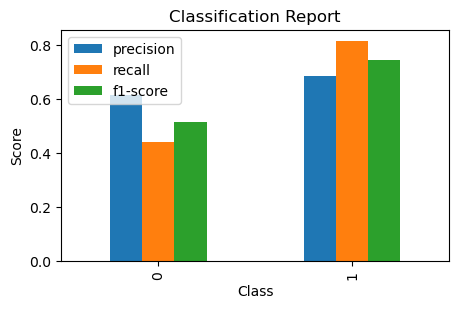

In [35]:
# To evaluate the model

# Predict on the test data
y_pred = logreg2.predict(X_test_ss)

# Generate and print a classification report to evaluate the model
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(report)
print(conf_matrix)

# Classification Report Visualization
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
# Plot precision, recall, and f1-score for each class
df_report[:-3].plot(kind='bar', y=['precision', 'recall', 'f1-score'], figsize=(5, 3))
plt.title('Classification Report')
plt.xlabel('Class')
plt.ylabel('Score')

The model shows a decent ability to correctly predict the positive class (class 1), with a precision of 0.69 and a recall of 0.81. This suggests that it effectively identifies instances that belong to the positive class.
Specificity (44%) suggests many false alarms for negative cases.

The overall accuracy of the model is 0.67, indicating that it correctly predicts the class for about two-thirds of the instances. 

The macro average F1-score is 0.63, suggesting a balanced performance across both classes. However, it's important to note that class 1 (positive class) has a higher F1-score, indicating better model performance in detecting positive instances.

The weighted average F1-score is 0.65, reflecting the overall model's performance, taking into account class imbalances.

The model demonstrates good recall but relatively lower specificity. It correctly identifies a significant portion of positive cases but also produces a notable number of false positives.

### C values
<a id='CV'></a>

In [21]:
# Logistic Regression with different C values
c_values = [0.01, 0.1, 1, 10, 100]
train_scores_lr = []
validation_scores_lr = []
performance_results = {}

for c in c_values:
    # Create and fit the logistic regression model with specified C value and max_iter
    LR = LogisticRegression(C=c, max_iter=1000)
    
    # Fit the model to the training data
    LR.fit(X_train_ss, y_train)
    
    # Evaluate the model and append scores
    train_scores_lr.append(LR.score(X_train_ss, y_train))
    validation_scores_lr.append(LR.score(X_test_ss, y_test))
     # Predict on the test set
    y_pred = LR.predict(X_test_ss)

    # Evaluate the model
    report = classification_report(y_test, y_pred, output_dict=True)
    performance_results[f'C={c}'] = report['accuracy']

# Convert the performance results to a DataFrame for better visualization
performance_df = pd.DataFrame.from_dict(performance_results, orient='index', columns=['Accuracy'])
performance_df

,Accuracy
C=0.01,0.665121
C=0.1,0.665139
C=1,0.665132
C=10,0.665128
C=100,0.665128


Accuracy results for different C values in logistic regression seem to be quite consistent. 

Across the range of C values tested (0.01, 0.1, 1, 10, 100), the accuracy scores remain very close, hovering around 66.5%.

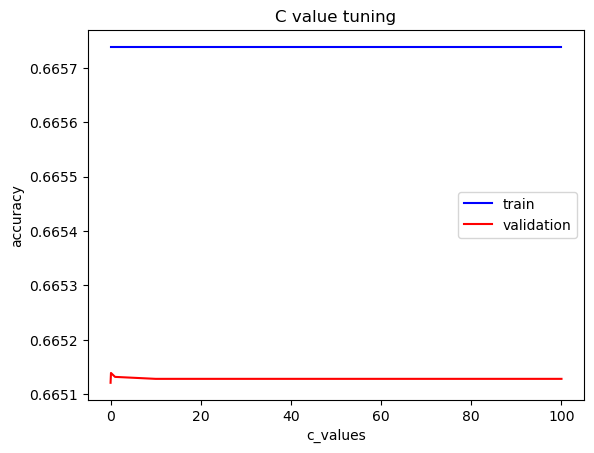

In [22]:
plt.figure()
plt.plot(c_values, train_scores_lr, c='blue', label='train')
plt.plot(c_values, validation_scores_lr, c='red', label='validation')
plt.xlabel('c_values')
plt.ylabel('accuracy')
plt.title('C value tuning')
plt.legend()
plt.show()

We can observe that the model doesnt seem to be sensitive to changes in this particular hyperparameter within the tested range.

## Regression coefficients
<a id='RC'></a>

In [26]:
#Extract the regression coefficients for each of our features and put them in a data frame:
coef_df = pd.DataFrame({'feature':X_train.columns, 'coef':logreg.coef_[0]})
coef_df

,feature,coef
0,aa,-0.016840
1,acai,-0.058904
2,ad,-0.082687
3,age,0.101411
4,air,-0.033884
...,...,...
498,zero,0.190670
499,zucchini,0.353599
500,add_to_cart_order,-0.041208
501,order_number,0.033845


In [27]:
#Drop the columns that are not products:
features_to_exclude = ['add_to_cart_order', 'user_id', 'order_number', 'days_since_prior_order']
coef_df = coef_df[~coef_df['feature'].isin(features_to_exclude)]
coef_df

,feature,coef
0,aa,-0.016840
1,acai,-0.058904
2,ad,-0.082687
3,age,0.101411
4,air,-0.033884
...,...,...
495,yoghurt,0.115137
496,yogurt,0.074530
497,yokid,0.056805
498,zero,0.190670


In [28]:
# Get top 20 from the list
top_20_coef = coef_df.sort_values(by='coef', ascending=False).head(20)
top_20_coef

,feature,coef
20,banana,1.353776
14,avocado,0.865818
484,water,0.739921
232,hummu,0.521391
251,larg,0.520362
214,half,0.510287
365,raspberri,0.504975
229,honeycrisp,0.491386
281,milk,0.489040
426,spinach,0.483948


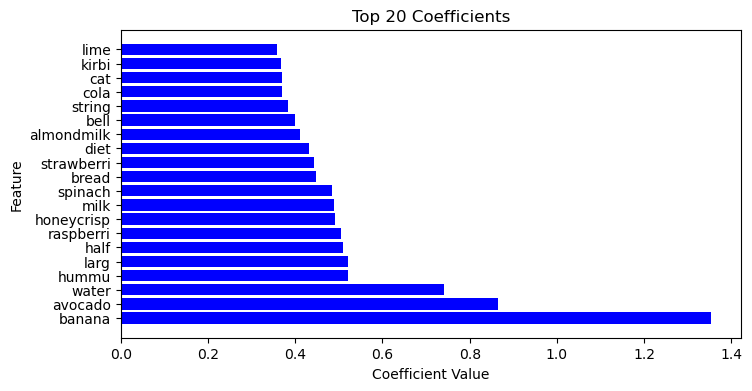

In [29]:
# Plotting the results
# Sort the coefficients by 'Coefficient' in ascending order to plot the top positive coefficients
top_20_coef = top_20_coef.sort_values(by='coef')

# Create a bar plot
plt.figure(figsize=(8, 4))
plt.barh(top_20_coef['feature'], top_20_coef['coef'], color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 20 Coefficients')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest coefficient at the top

We get the similar results as the top most reordered 20 products.

Organ (Organic) is the most influential for positive sentiment. It's followed by 'banana' and 'milk', which are also significant contributors but with a lesser impact compared to 'organ'. Water, yogurt, avocado are also in top 10 products. 

### Conclusion

In [47]:
metrics_df

,Hyperparamater,Training Accuracy,Test Accuracy,Notes
Logistic,None,0.664594,0.663919,relatively good performance
Logistic_ss,scaled,0.665739,0.665139,performance improved after scaling


Logistic Regression model has shown the overall accuracy of 67%, indicating that it correctly predicts the class for about two-thirds of the instances.

The performance improved slightly after scaling the features.The test accuracy is slightly higher than the training accuracy, suggesting robustness and generalization.

The model demonstrates good recall but relatively lower specificity. It correctly identifies a significant portion of positive cases but also produces a notable number of false positives.

Lets continue our analysis in the next notebook with Decision Tree model looking for an optimal solution with an elevated accuracy.

---

### [BACK TO INDEX](#INDEX)